# **Домашняя работа №4.**

Максимальная оценка - 10 баллов.

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

Задание состоит из двух разделов:
1. В первом разделе вам нужно вычислить энтропию и информационный выигрыш для простых примеров. Максимальный балл в этой части: **4 балла**.
2. Во втором разделе вы научитесь применять деревья из sklearn для задачи классификации. На примере различных метрик вы посмотрите на качество своей модели. Дополнительно вы посмотрите на стандартные примеры датасетов из sklearn и на то, как дерево с ними справится. Максимальный балл в этой части: **6 баллов**.

Загрузим необходимые библиотеки:

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (9, 6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

In [3]:
 #!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

## **Часть 1**

На лекции и семинарах вы изучали такие понятия, как энтропия и информационный выигрыш. Сейчас мы попрактикуемся в их вычислении.

Напомним, что **энтропия Шеннона** вычисляется следующим образом по N возможному числу состояний:

$$\large S = - \sum_{i=1}^N p_i log_2 p_i$$

где $p_i$ - вероятность найти систему в i-ом состоянии.

Рассмотрим пример. Пусть дана система (датасет), в которой определены два состояния (вероятности). Первое $\large p_1=\frac{3}{7}$ и второе $\large p_2=\frac{4}{7}$. Тогда энтропия вычисляется так:

$\large S_0=−\frac{3}{7} * log_2 \frac{3}{7} - \frac{4}{7} * log_2 \frac{4}{7} ≈ 0.9852$

Теперь рассмотрим случай, когда систему (датасет) поделили относительно некоторого признака. На левую часть и на правую. Чему теперь равна энтропия каждой из частей? И чему будет равен информационный выигрыш при таком делении?

Энтропия левой части равна: $\normalsize S_1=−\frac{1}{4} * log_2 \frac{1}{4} - \frac{3}{4} * log_2 \frac{3}{4} ≈ 0.8113$.

Энтропия правой части равна: $\normalsize S_2=−\frac{2}{3} * log_2 \frac{2}{3} - \frac{1}{3} * log_2 \frac{1}{3} ≈ 0.9183$.

Как вы можете видеть, значение энтропии стало меньше в двух группах. Особенно в левой группе. Посколько энтропия является мерой хаоса (или неопределённости) в системе, то мы говорим, что информационный выигрыш характеризуется уменьшением энтропии.

Информационный выигрыш (Information Gain, IG) для разделения на основе признака Q выглядит следующим образом:

$$\large IG(Q)=S_0 - \sum_{i=1}^q\frac{N_i}{N} S_i$$

где $q$ - число групп после деления, $N_i$ - количество объектов в выборке, в которой признак $Q$ равен i-ому значению.

**Информационный выигрыш = сколько энтропии мы удалили**, поэтому для нашего примера:

$$\normalsize IG=0.985 − (\frac{3}{7} * 0.9183 + \frac{4}{7} * 0.8113) ≈ 0.985 - 0.857 = 0.128 $$

Теперь напишем функции для вычисления энтропии и информационного выигрыша.

Рассмотрим следующий простой пример: у нас есть 9 синий и 11 жёлтых мячей. Пусть мяч будет иметь метку **1**, если он синий, **0** в противном случае.

In [4]:
balls = [1 for i in range(9)] + [0 for i in range(11)]
balls

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

<img src = 'https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png'>

Затем разделим мячи на две группы по некоторому признаку:

<img src='https://habrastorage.org/webt/bd/aq/5w/bdaq5wi3c4feezaexponvin8wmo.png'>

In [5]:
# две группы
balls_left  = [1 for i in range(8)] + [0 for i in range(5)] # 8 синих и 5 жёлтых
balls_right = [1 for i in range(1)] + [0 for i in range(6)] # 1 синий и 6 жёлтых
balls_left, balls_right

([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0])

### **Задание 1 (1 балл).**

Напишите функцию, вычисляющую энтропию по Шеннону. И примените её для для следующих наборов данных.

In [6]:
def entropy(list_):
    n_conditions = list(set(list_))
    s = 0
    for i in n_conditions:
        p = list_.count(i)/len(list_)
        s -= p*math.log2(p)
    return s
    ### (o˘◡˘o)

Проверка:

In [7]:
print(entropy(balls)) # 9 синих и 11 жёлтых
print(entropy(balls_left)) # 8 синих и 5 жёлтых
print(entropy(balls_right)) # 1 синий и 6 жёлтых

0.9927744539878083
0.9612366047228759
0.5916727785823275


### **Задание 2 (1 балл).**

Чему равна энтропия бросания монетки (без учёта ребра и с равными вероятностями для сторон монетки)?

In [8]:
coin_flip = [0, 1]
print(entropy(coin_flip))
### (´｡• ω •｡)

1.0


### **Задание 3 (1 балл).**

Чему равна энтропия игральной кости (мы рассматриваем игральную кость, как систему с 6 равновероятными состояниями)?

In [9]:
dice = [1, 2, 3, 4, 5, 6]
print(entropy(dice))

2.584962500721156


### **Задание 4 (1 балл).**

Напишите функцию, которая вычисляет информационный выигрыш при делении исходных данных на **balls_left** and **balls_right** ?

In [10]:
# вычисление информационного выигрыша

def information_gain(full_data, left, right):
    ''' full_data - исходные данные, left и right - две части исходных данных'''
    return entropy(full_data) - len(left)/len(full_data)*entropy(left) - len(right)/len(full_data)*entropy(right)

Проверка:

In [11]:
print(round(information_gain(balls, balls_left, balls_right), 3))

0.161


## **Часть 2**

В этой части мы рассмотрим дерево из sklearn на примере задачи классификации. В качестве данных мы возьмём The "Adult" Dataset.

Сначала сделаем предобработку данных, затем приступим к обучению модели.

Описание датасета:

[Dataset](https://www.kaggle.com/datasets/sagnikpatra/uci-adult-census-data-dataset) UCI Adult (файлы не нужно загружать, они доступны в репозитории данного курса ): классификация людей на основе демографических данных - зарабатывает ли человек более \$50,000 в год или нет.

Описание входных признаков:

- **Age** – непрерывный признак
- **Workclass** –  непрерывный признак
- **fnlwgt** – конечный вес объекта, непрерывный признак
- **Education** –  категориальный признак
- **Education_Num** – количество лет образования, непрерывный признак
- **Martial_Status** –  категориальный признак
- **Occupation** –  категориальный признак
- **Relationship** – категориальный признак
- **Race** – категориальный признак
- **Sex** – категориальный признак
- **Capital_Gain** – непрерывный признак
- **Capital_Loss** – непрерывный признак
- **Hours_per_week** – непрерывный признак
- **Country** – категориальный признак

**Target** – уровень дохода, категориальный (бинарный) признак.

Датасет состоит из двух файлов: для обучения и для тестирования.

In [12]:
# Загрузка файла

!wget https://raw.githubusercontent.com/hse-ds/ml-hse-nes/refs/heads/main/2024/homeworks/homework_4/adult_train.csv

zsh:1: command not found: wget


In [13]:
# Загрузка файла

!wget https://raw.githubusercontent.com/hse-ds/ml-hse-nes/refs/heads/main/2024/homeworks/homework_4/adult_test.csv

zsh:1: command not found: wget


In [14]:
data_train = pd.read_csv('adult_train.csv')

In [15]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
data_test = pd.read_csv('adult_test.csv')

In [17]:
data_test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [18]:
# удаляем строчки с неверными метками в тестовых данных
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]

# кодируем целевую переменную как целое число
data_train.loc[data_train['Target']==' <=50K', 'Target'] = 0
data_train.loc[data_train['Target']==' >50K', 'Target'] = 1

data_test.loc[data_test['Target']==' <=50K.', 'Target'] = 0
data_test.loc[data_test['Target']==' >50K.', 'Target'] = 1

In [19]:
data_train.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [20]:
data_test.isna().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64

Первичный анализ датасета.

In [21]:
data_test.describe()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [22]:
data_train['Target'].value_counts()

Target
0    24720
1     7841
Name: count, dtype: int64

In [23]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(np.ceil(float(data_train.shape[1]) / cols))
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.tight_layout()

Давайте посмотрим на типы данных в наших датасетах.

In [24]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [25]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

Как мы видим, в тестовых данных признак Age рассматривается, как тип **object**. Нам нужно это исправить.

In [26]:
data_test['Age'] = data_test['Age'].astype(int)

Также мы приведём все признаки с типами **float** к типам **int**, чтобы обеспечить согласованность типов между нашими обучающими и тестовыми данными.

In [27]:
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

Мы заполним пропущенные значения медианами для непрерывных признаков и модами для категориальных.

In [28]:
# выбираем категориальные и непрерывные признаки из данных

categorical_columns = [c for c in data_train.columns
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [29]:
# можно заметить пропущенные значения
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
# заполняем пропущенные значения
for c in categorical_columns:
    data_train[c] = data_train[c].fillna(data_train[c].mode()[0])
    data_test[c] = data_test[c].fillna(data_test[c].mode()[0])

for c in numerical_columns:
    data_train[c] = data_train[c].fillna(data_train[c].median())
    data_test[c] = data_test[c].fillna(data_test[c].median())

In [31]:
# пропусков нет
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


Закодируем некоторые категориальные признаки: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country**. Это можно сделать с помощью метода `get_dummies` в pandas.

In [32]:
data_train = pd.concat([data_train[numerical_columns],
    pd.get_dummies(data_train[categorical_columns])], axis=1)

data_test = pd.concat([data_test[numerical_columns],
    pd.get_dummies(data_test[categorical_columns])], axis=1)

In [33]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [34]:
data_train.shape, data_test.shape

((32561, 106), (16281, 105))

Тут вы можете заметить, что одного признака нет в тестовых данных. Можно создать новый нулевой признак.

In [35]:
data_test['Country_ Holand-Netherlands'] = 0

In [36]:
set(data_train.columns) - set(data_test.columns)

set()

In [37]:
data_train.head(1)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [38]:
data_test.head(1)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_ Holand-Netherlands
1,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,0


Однако теперь видим, что порядок признаков в двух наборах данных может быть нарушен. Чтобы модель при предсказании не ругалась на это (порядок признаков в обучении и тестировании должен совпадать), можно выполнить следующее действие.

In [39]:
data_train = pd.concat([data_train.drop(['Country_ Holand-Netherlands'], axis=1), data_train['Country_ Holand-Netherlands']], axis=1)

In [40]:
data_train.head(1)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_ Holand-Netherlands
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [41]:
data_test.head(1)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_ Holand-Netherlands
1,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,0


In [42]:
data_train.shape, data_test.shape

((32561, 106), (16281, 106))

In [43]:
X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

Рассмотрим решающее дерево без оптимизации гиперпараметров.

### **Задание 5 (2 балла).**

Обучите `DecisionTreeClassifier` с глубиной равной 3. Используйте параметр `random_state = 17` для воспроизводства результатов. Получите гиперпараметры из модели. Получите оценку меток классов и вероятностей классов. Для проверки качества модели посчитайте следующие метрики на тестовых данных: `Accuracy`, `Precision`, `Recall` и `F1`. Какой можно сделать вывод на основе полученных значений?

In [46]:
tree_clf = DecisionTreeClassifier(random_state=17, max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

Гиперпараметры вашей модели:

In [47]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

Сделайте предсказание обученной модели на тестовых данных.

In [48]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

tree_predictions = tree_clf.predict(X_test)
tree_predictions_proba = tree_clf.predict_proba(X_test)

In [49]:
tree_predictions[:5]

array([0, 0, 0, 1, 0])

In [50]:
tree_predictions_proba[:5]

array([[0.97533179, 0.02466821],
       [0.70327688, 0.29672312],
       [0.70327688, 0.29672312],
       [0.02083333, 0.97916667],
       [0.97533179, 0.02466821]])

Какова точность (`Accuracy`) такого решающего дерева? Тоже самое сделайте для других метрик. Можно ли что-то сказать про сбалансированность классов?

In [51]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

accuracy = accuracy_score(tree_predictions, y_test)
precision = precision_score(tree_predictions, y_test)
recall = recall_score(tree_predictions, y_test)
f1 = f1_score(tree_predictions, y_test)
print(accuracy, precision, recall, f1)

0.8447884036607088 0.5070202808112324 0.7555211158465711 0.6068149992220321


Accuracy довольно высокий, но precision низкий, recall достаточно высокий. Получается по всем классам модель угадывает довольно хорошо, но верно находит только половина пресказанных моделью положительных наблюдений правда положительные => получается высокая общая точность модели достигнута за счет того, что она часто угадывает более многочисленный класс, но она плохо определяет более редкий класс => можем преддположить, что классы несбалансированные

### **Задание 6 (2 балла).**

* Нарисуйте ROC-кривую и посчитайте AUC ROC для неё. Какие можно сделать выводы?

* Также нарисуйте Precision-Recall-кривую и посчитайте Average Precision метрику для неё. Какие здесь можно сделать выводы?

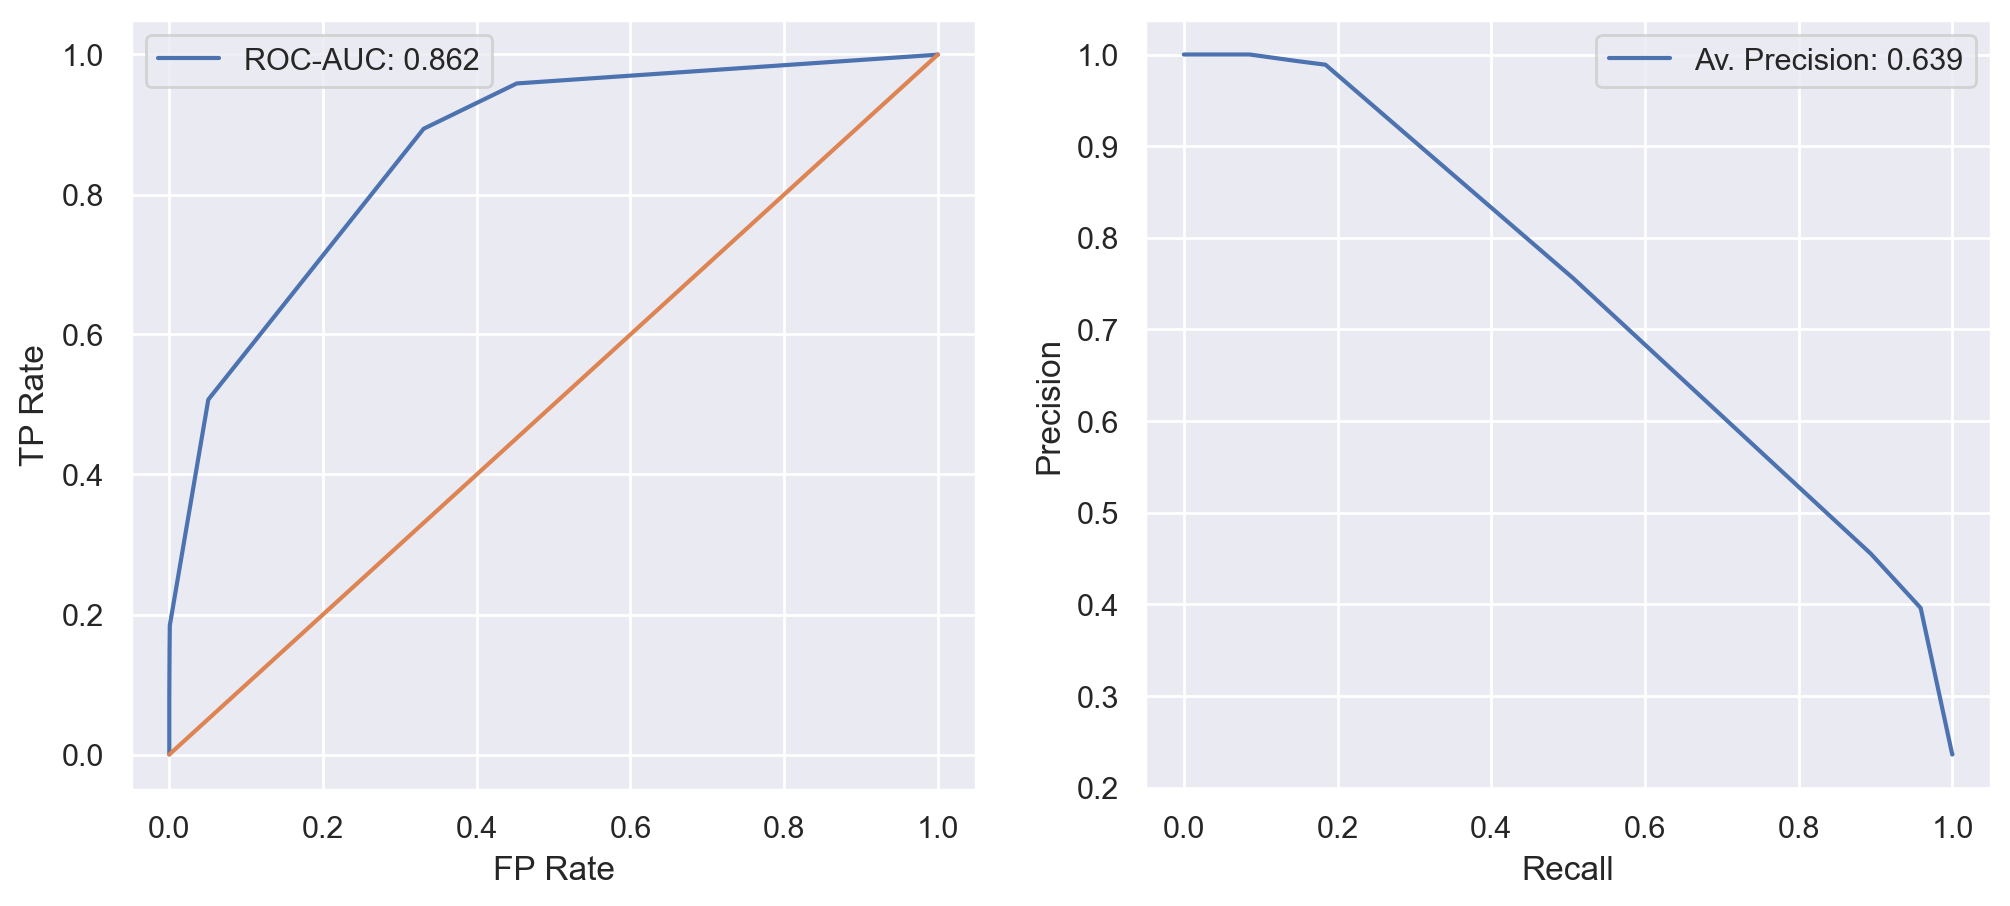

In [54]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

y_proba = tree_predictions_proba[:, 1];

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# ROC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC-AUC: {roc_auc:.3f}')
plt.plot([0, 1], [0, 1])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend()
plt.grid(True)

# PR 
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Av. Precision: {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.show()

ROC-AUC довольно высокий, модель хорошо справляется с тем, чтобы различать классы; с вероятностью 0,86 правильно различает положительный и отрицательный классы. Avarage Precision -- средненький, среди пресказанных положительных классов только 64% реально положительны, т.е. модель выдает довольно много ложно-положительных предсказаний. 

Теперь посмотрим на работу дерева на следующих стандартных датасетах.

### **Задание 7 (2 балла).**

Даны следующие датасеты из sklearn. Для начала нарисуйте их через `scatter`, каждый в отдельности. И обучите `DecisionTreeClassifier` с `random_state=17` на каждом датасете. Получите значения меток классов на тестовых данных. Чему равна метрика `Accuracy` для каждого случая? Затем покажите графически результат работы моделей через `plot_decision_regions`.

В этом задании предпочтительнее использовать цикл, чтобы не писать одинаковый код несколько раз. Попробуйте сделать именно так.

Какие выводы можно сделать? Есть ли признаки переобучения деревьев? Если да, то какие? И что можно сделать в случае, если дерево переобучается?

In [55]:
# уже готовые датасеты

datasets = [
    make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=17),
    make_moons(n_samples=1000, noise=0.1, random_state=17),
    make_classification(n_samples=1000, n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=17,
                        n_redundant=0)
]

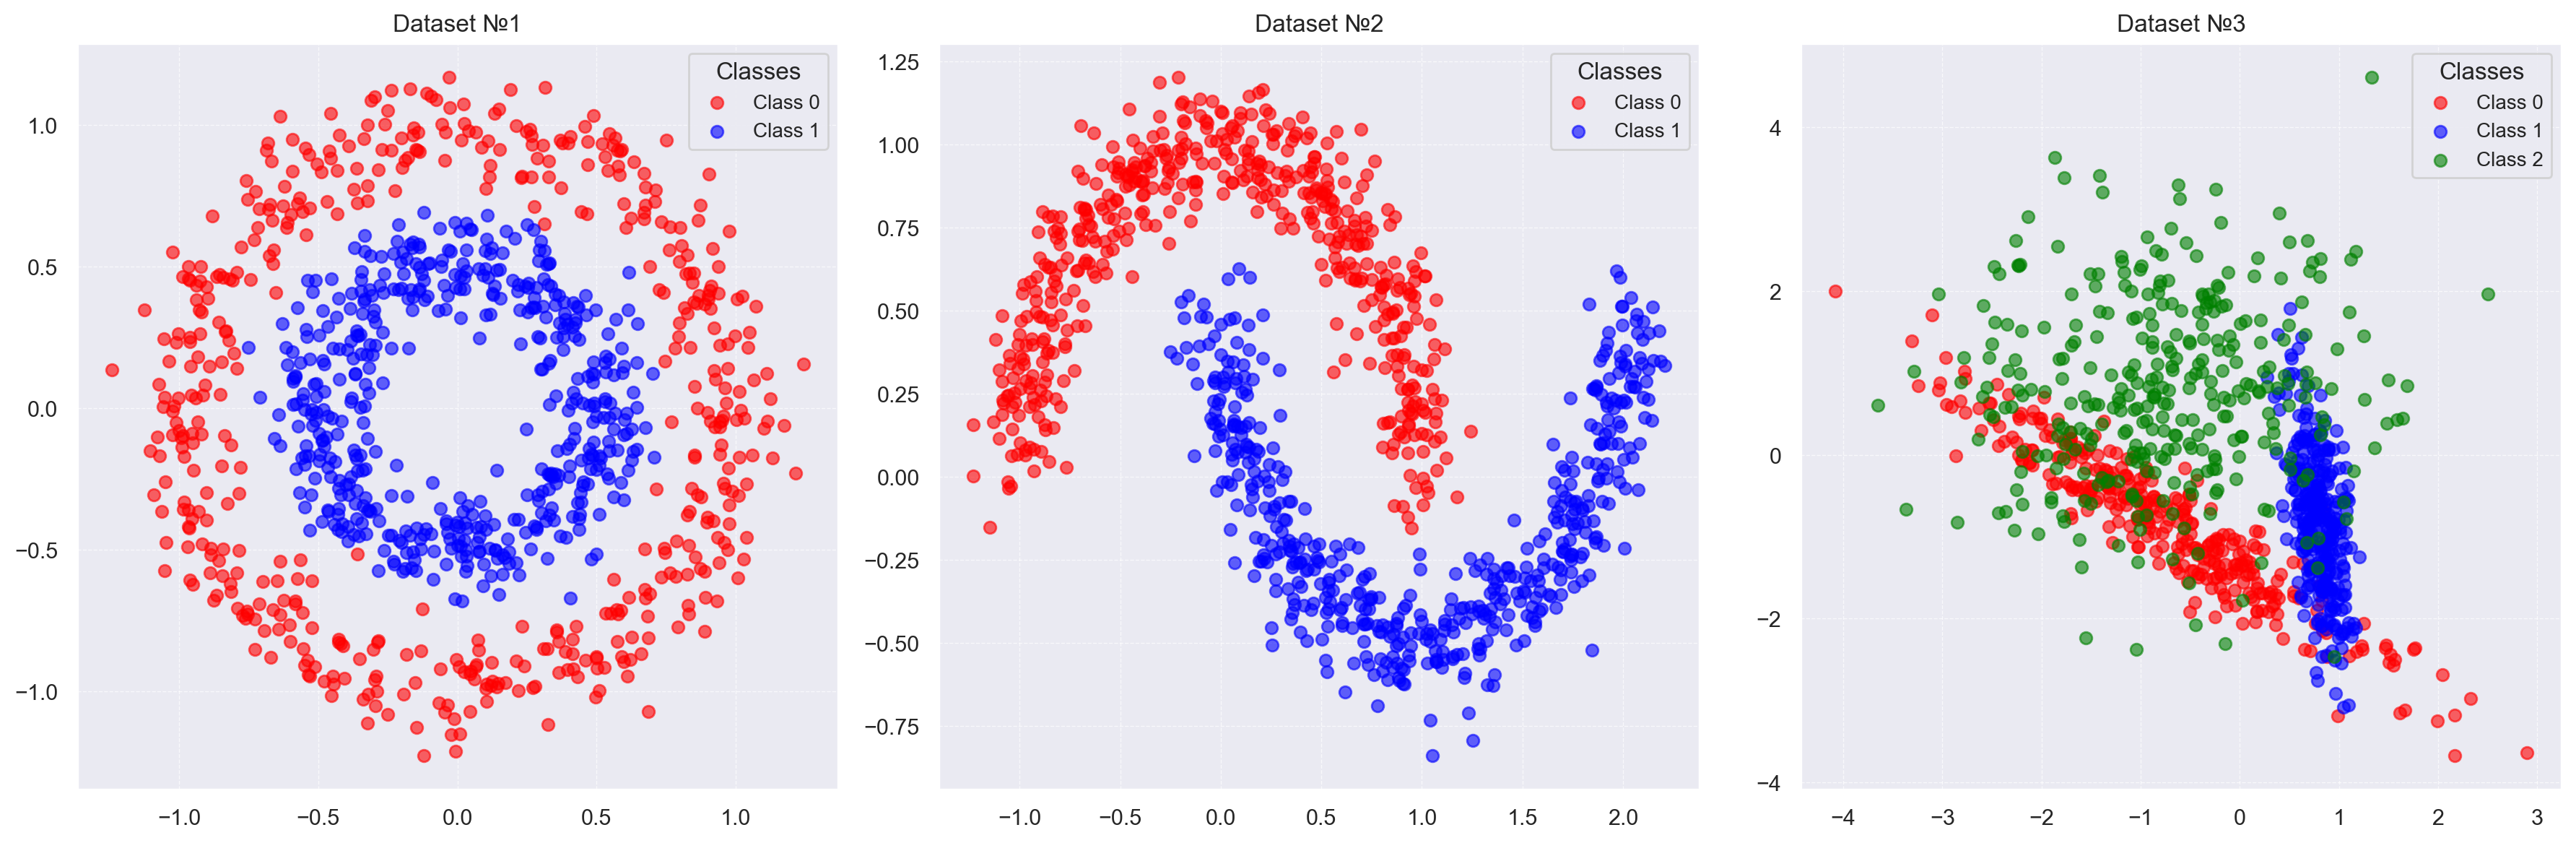

In [57]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
colors = ['red', 'blue', 'green']

fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6))

for i, (Xy, y) in enumerate(datasets):
    X = Xy
    ax = axes[i]
    x = X[:, 0]
    y_true = X[:, 1]
    labels = y
    
    for j in range(len(set(labels))):
        ax.scatter(
            x[labels == j],
            y_true[labels == j],
            color=colors[j % len(colors)],
            label=f'Class {j}',
            alpha=0.6
        )
    ax.set_title(f'Dataset №{i+1}')
    ax.legend(loc='best', fontsize=10, title='Classes', title_fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

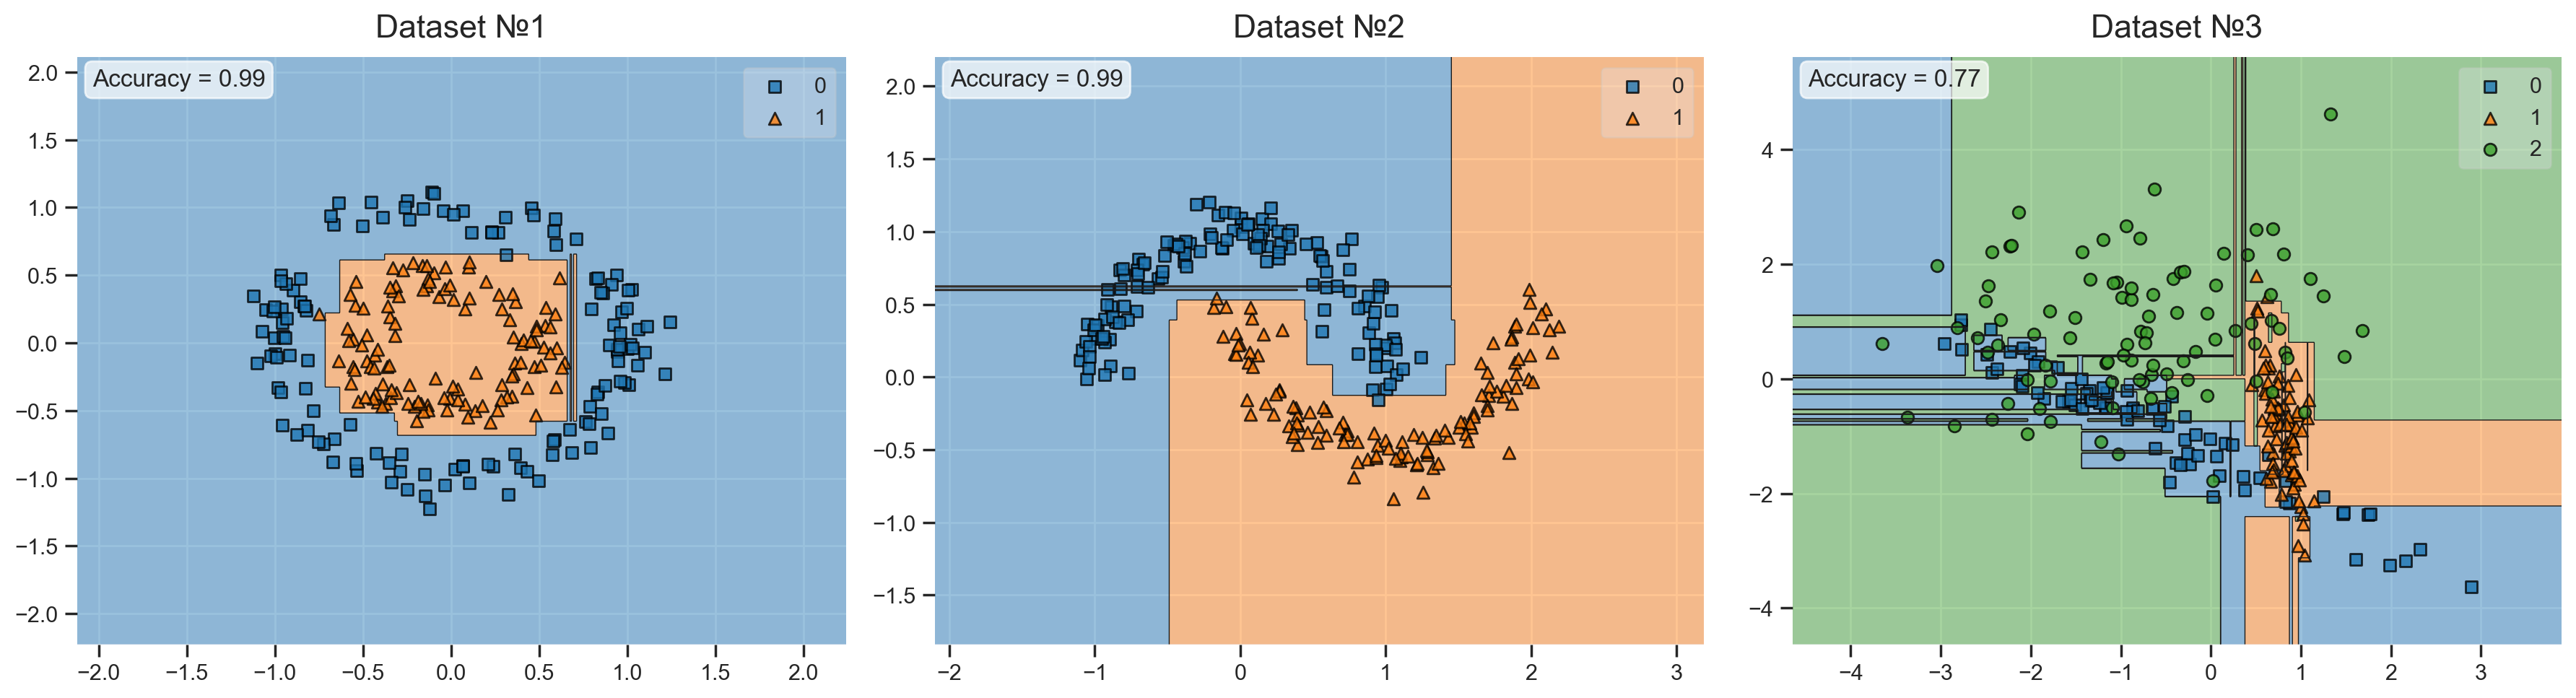

In [61]:
plt.figure(figsize=(18, 5));

for i, (X, y) in enumerate(datasets, start=1):

    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

    tree_clf = DecisionTreeClassifier(random_state=17)
    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    plt.subplot(1, len(datasets), i)
    plot_decision_regions(X_test, y_test, tree_clf)
    plt.title(f'Dataset №{i}', fontsize=16, pad=10)

    plt.text(
        0.02, 0.98, 
        f'Accuracy = {accuracy:.2f}',
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
    )

plt.tight_layout()
plt.show()

На первых двух графиках модель определяет классы довольно точно, и не так много делений у нее получилось. С третьей модель справилась хуже и очень много использовано делений, линейная классификция в этом случае была бы эффективнее.

Признаки переобучения есть во всех трех случаях, это видно по таким гоизонтальным и вартикальным линиям, зашумляющим графики, особенно заметно на третьем графике. Некоторые классы там накладываются друг на друга и модель делает много личшних предикатов.

Чтобы модель не переобучалась можно задать различные критерии остановки, такие как глубина или количество листов.